# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [3]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=20_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus_final'
perusresults='results/perus_results_final'


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

simulating  best/malli_perus_final
predicting...




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








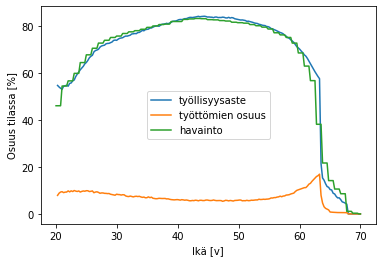

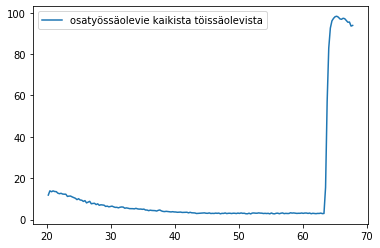

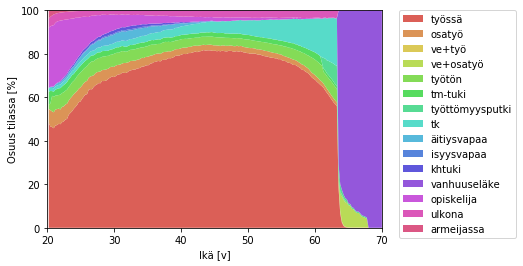

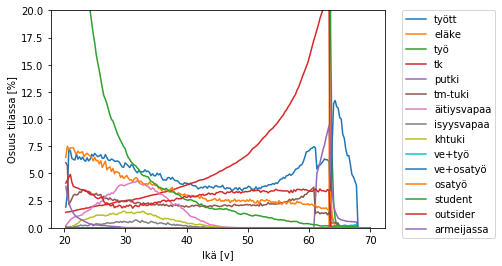

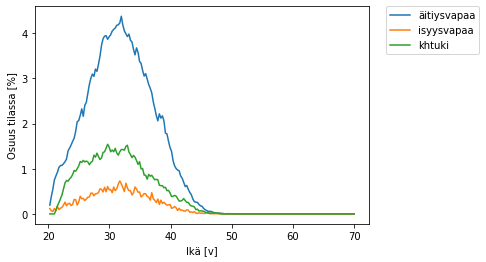

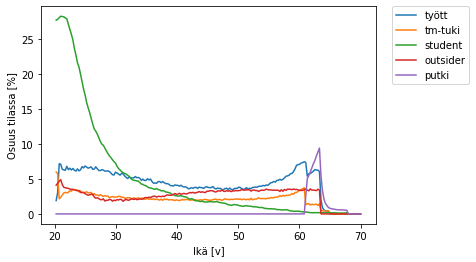

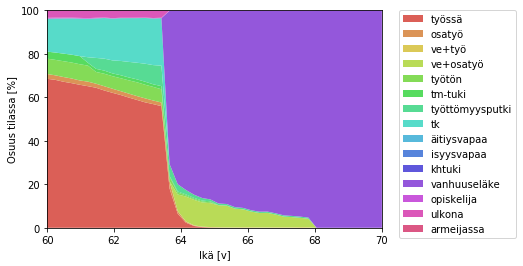

keskimääräinen työttömyysaste 9.353126228192172


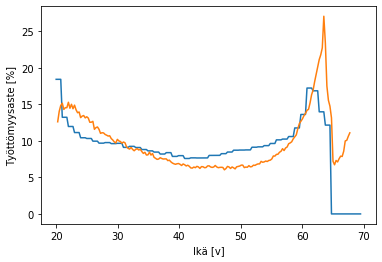

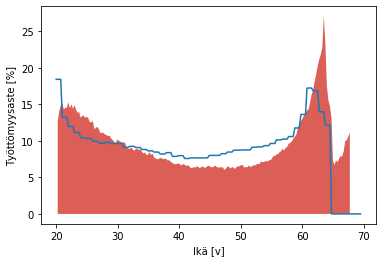

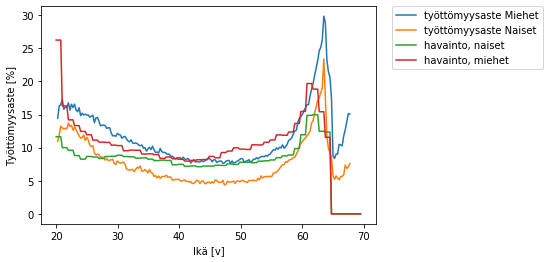

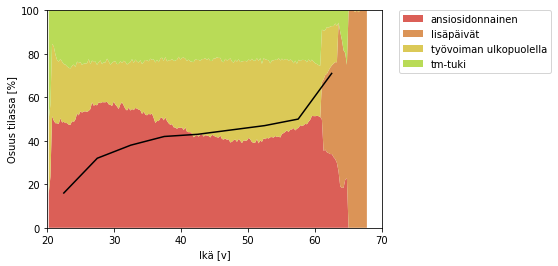

keskimääräinen työttömien osuus väestöstä 6.816532583182527


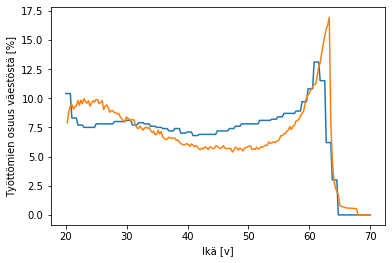

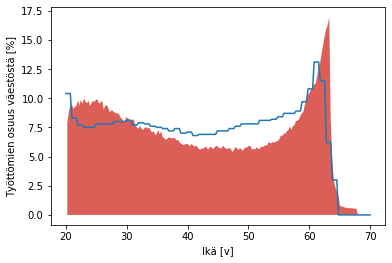

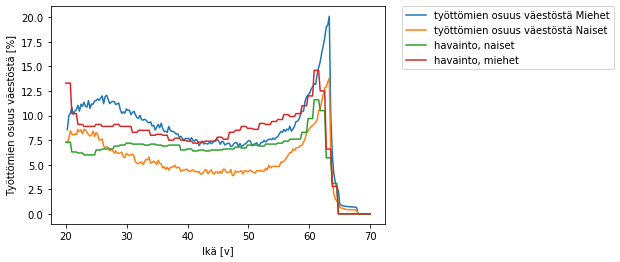

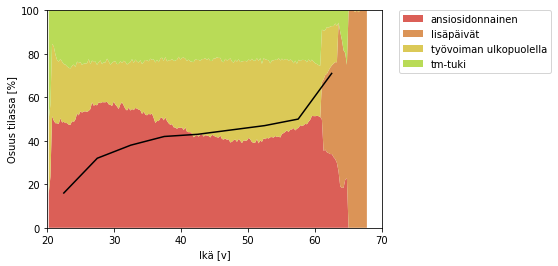

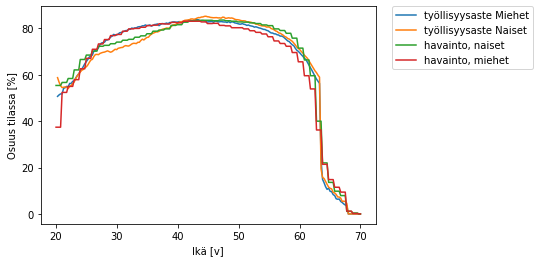

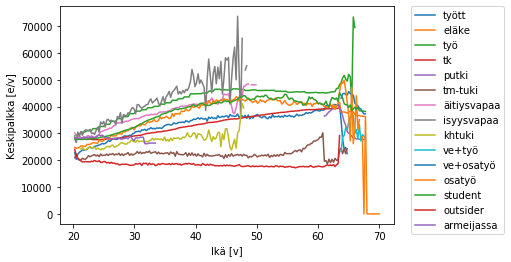

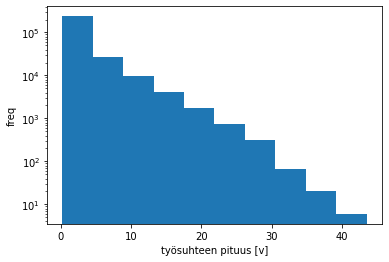

Jakauma ansiosidonnainen+tmtuki+putki


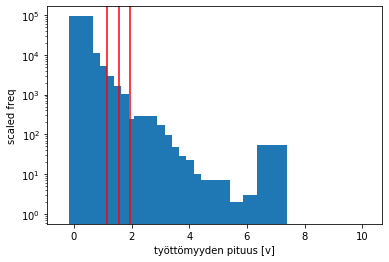

Jakauma ansiosidonnainen+tmtuki ilman putkea


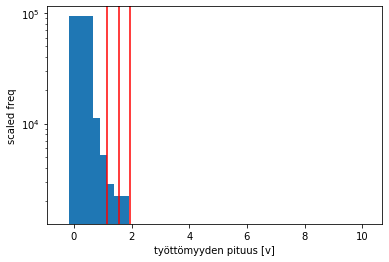

Jakauma tmtuki


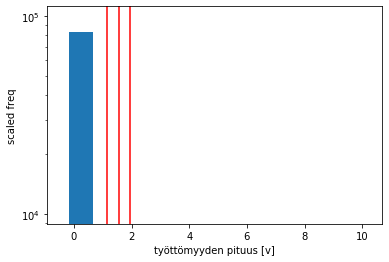

Jakauma työvoiman ulkopuoliset


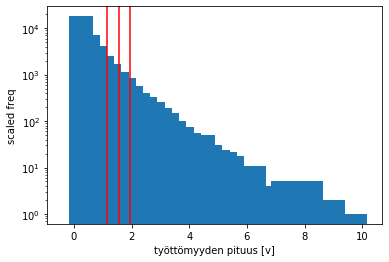

Jakauma laaja (ansiosidonnainen+tmtuki+putki+ulkopuoliset)


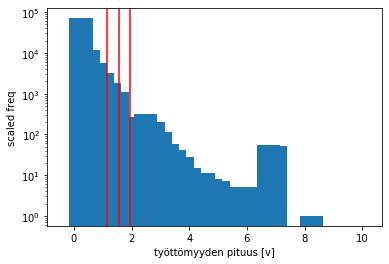

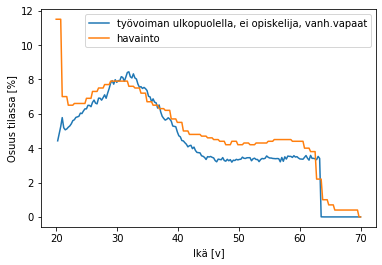

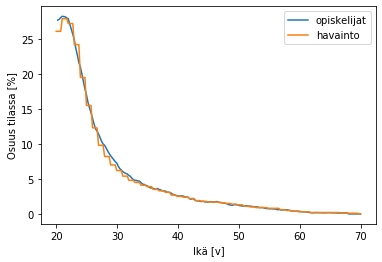

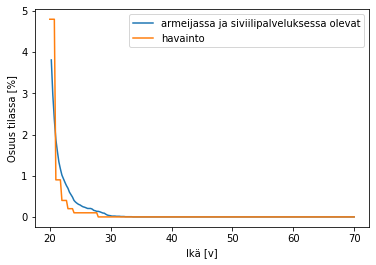

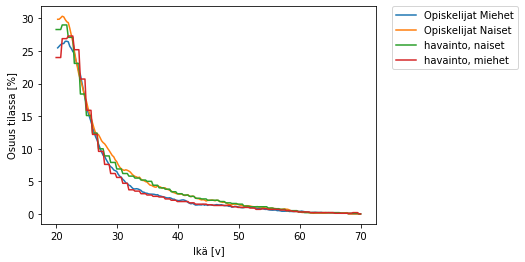

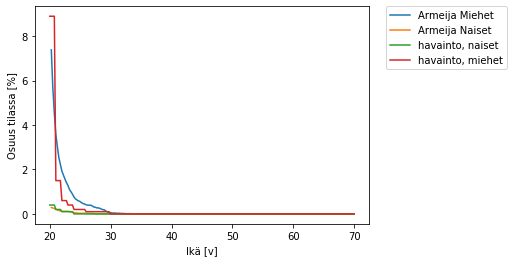

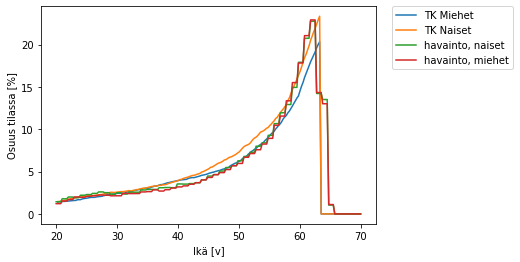

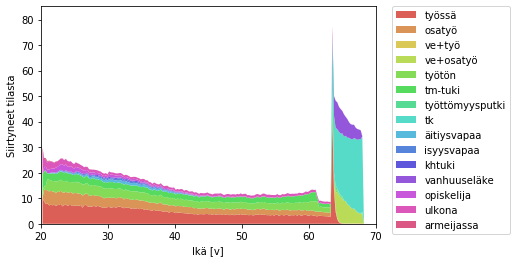

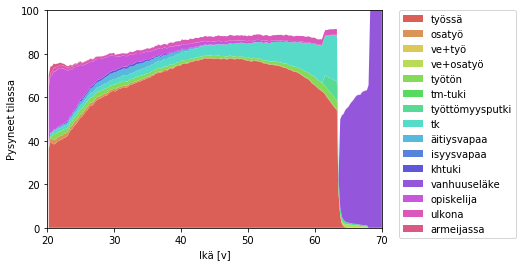

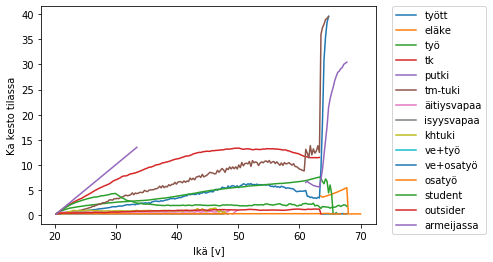

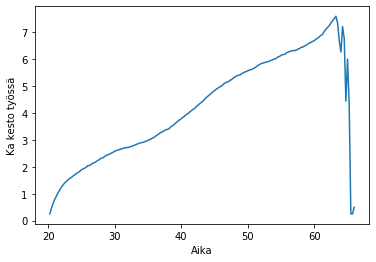

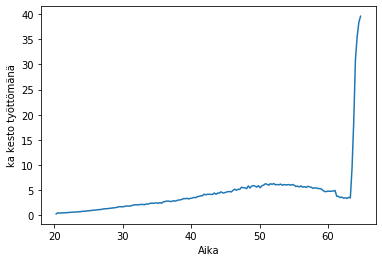

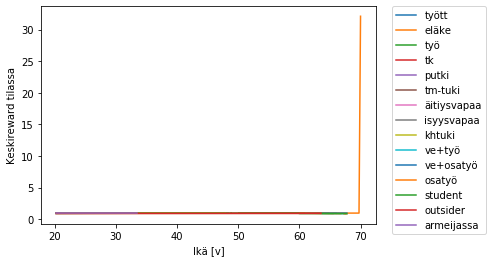

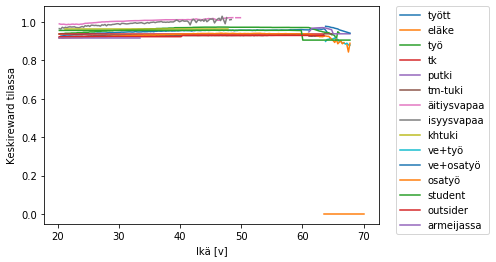

No handles with labels found to put in legend.


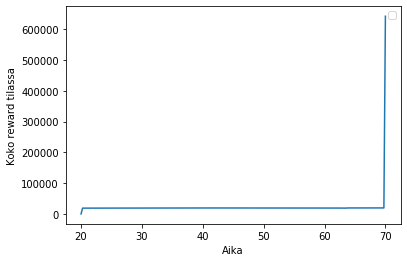

Yhteensä reward 224.0826510543842


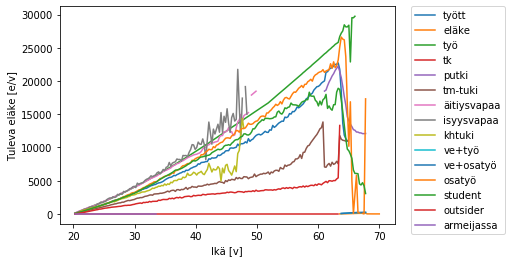

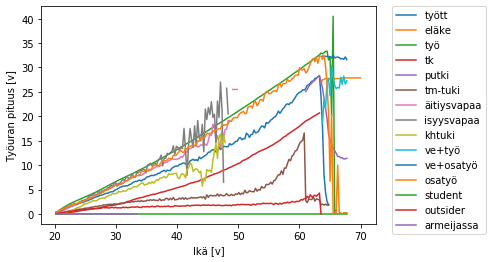

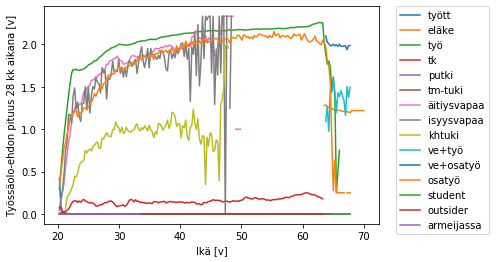

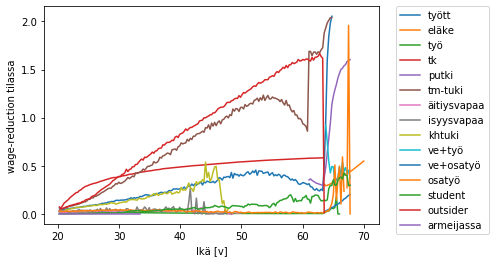

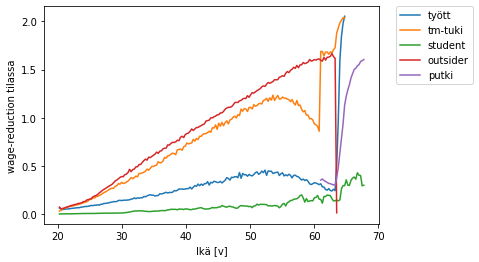

In [4]:
if True: # no baseline here
    cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=False)
    cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,
                    save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/perus_results9',
                    callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

# Politiikkavaihtoehtolaskelmia

Seuraavassa on toteutettu kokoelma politiikkavaihtoehtoja. Näiden laskeminen ei tuota arvioita ennen kuin perusmalli konvergoi stabiilisti,

## Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.25 scaled 0.75

training...








---------------------------------
| explained_variance | 0.0255   |
| fps                | 3290     |
| nupdates           | 1        |
| policy_entropy     | 1.39     |
| policy_loss        | 17.8     |
| total_timesteps    | 0        |
| value_loss         | 176      |
---------------------------------


done
simulating  best/malli_putki
predicting...


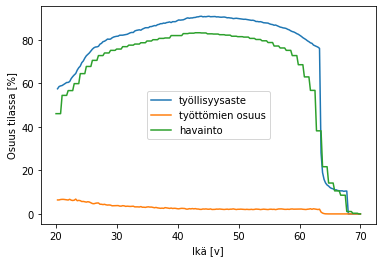

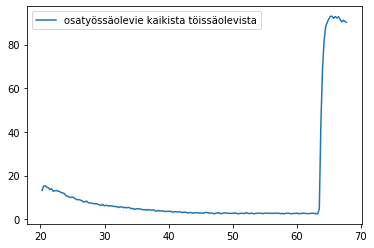

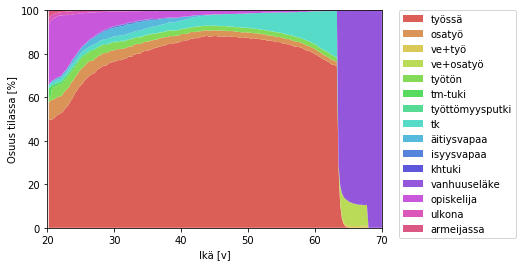

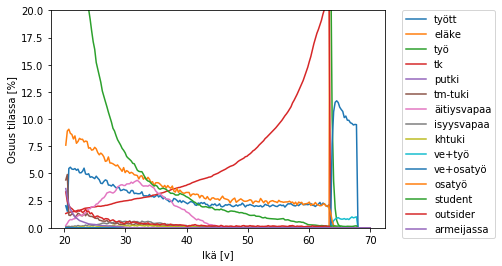

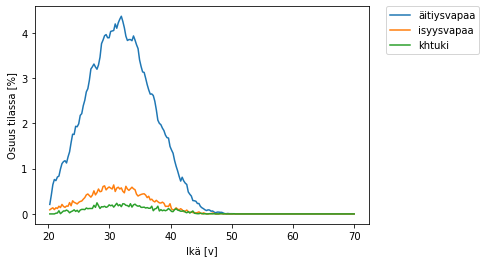

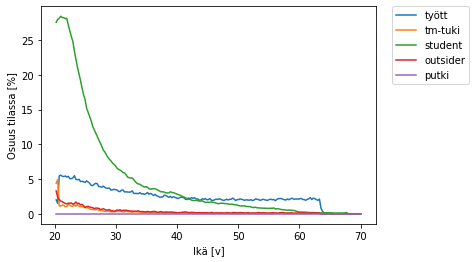

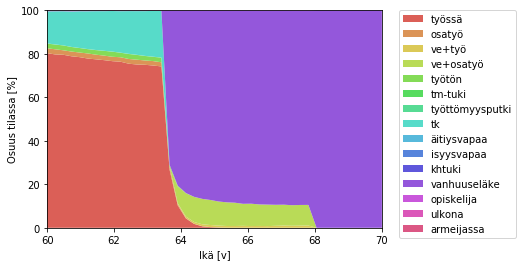

keskimääräinen työttömyysaste 3.5792602531730324


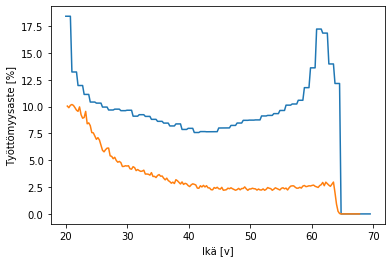

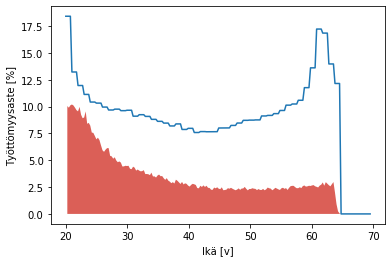

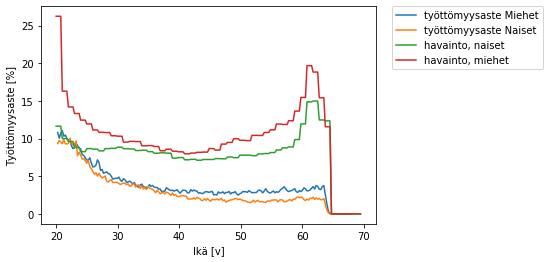

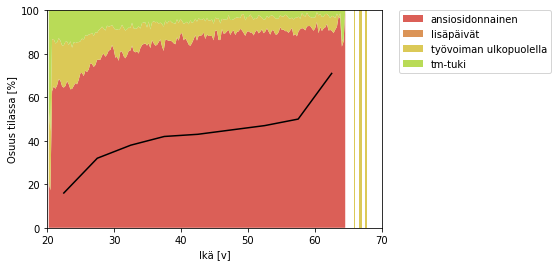

keskimääräinen työttömien osuus väestöstä 2.713747190418456


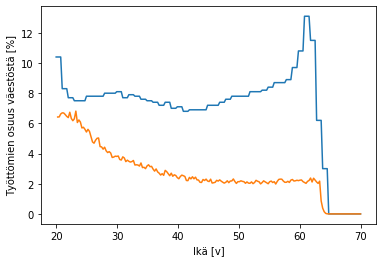

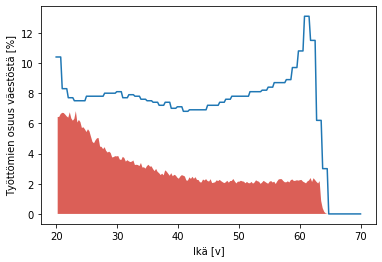

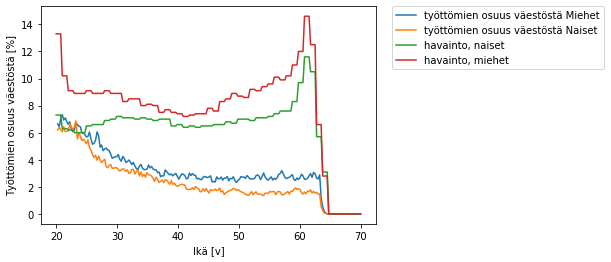

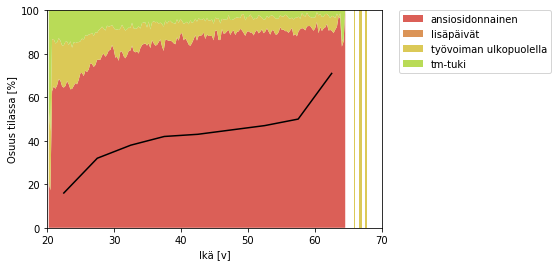

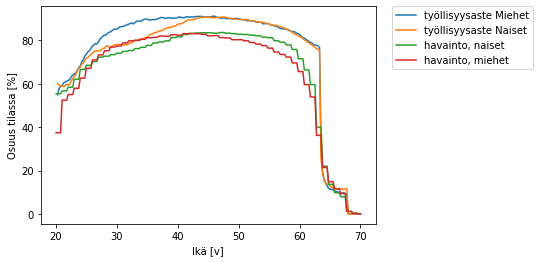

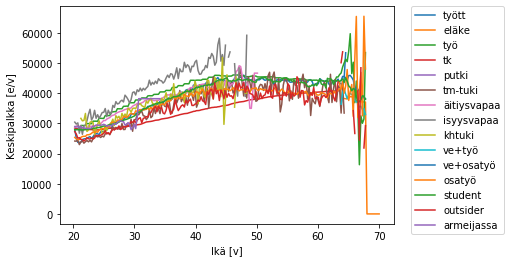

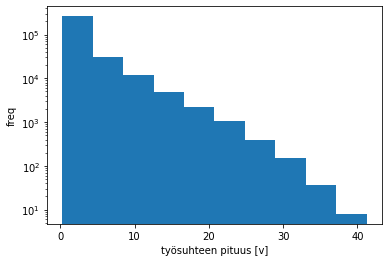

Jakauma ansiosidonnainen+tmtuki+putki


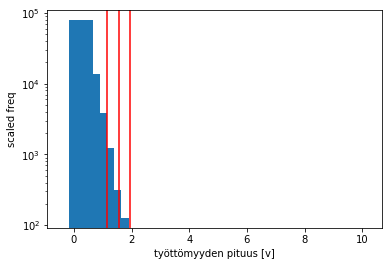

Jakauma ansiosidonnainen+tmtuki ilman putkea


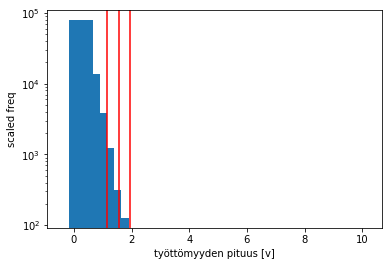

Jakauma tmtuki


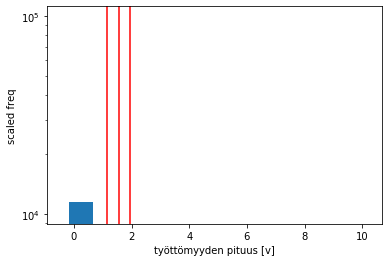

Jakauma työvoiman ulkopuoliset


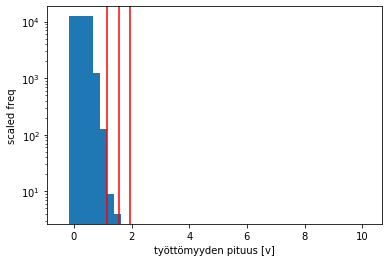

Jakauma laaja (ansiosidonnainen+tmtuki+putki+ulkopuoliset)


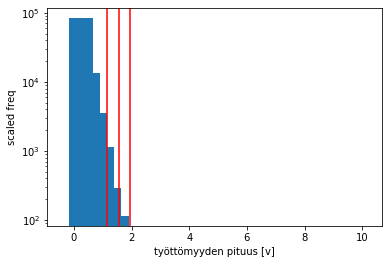

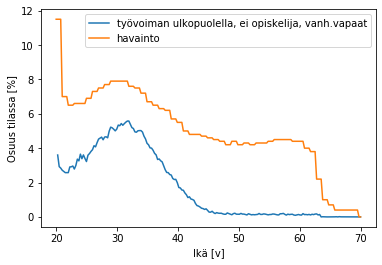

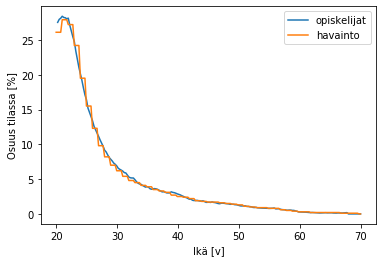

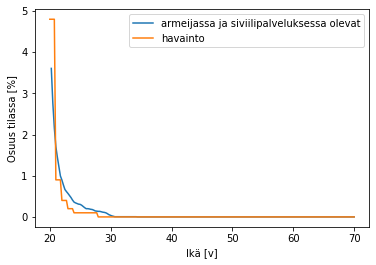

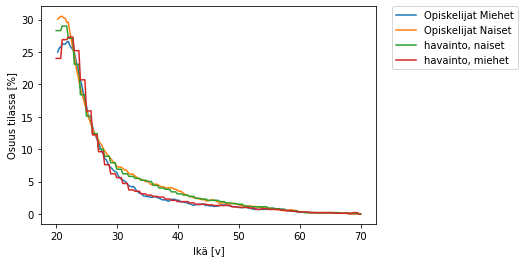

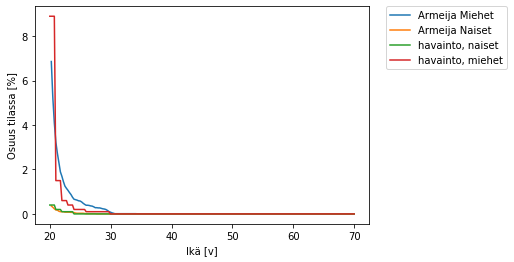

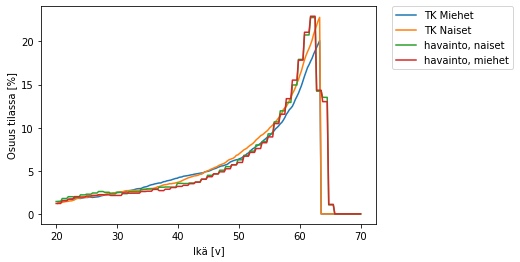

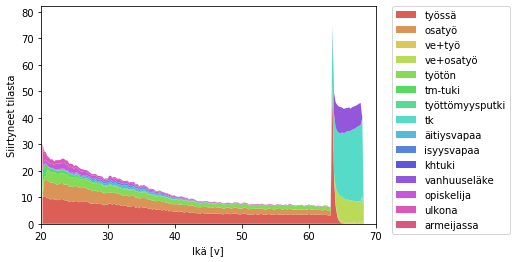

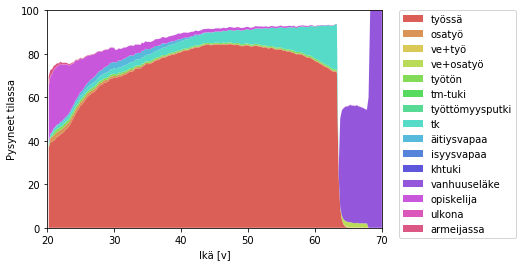

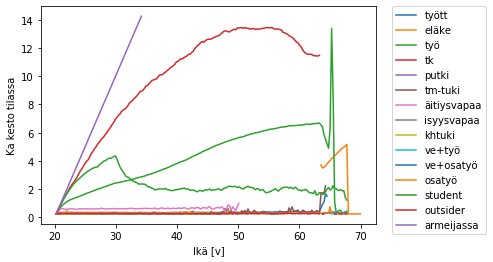

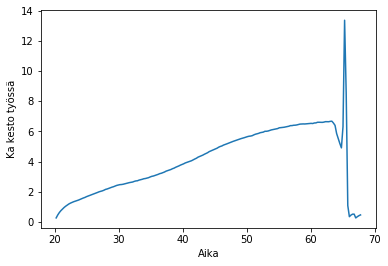

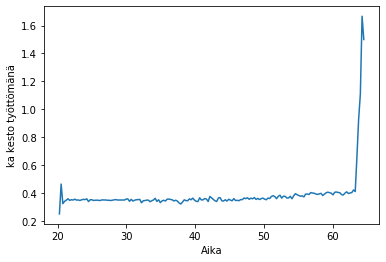

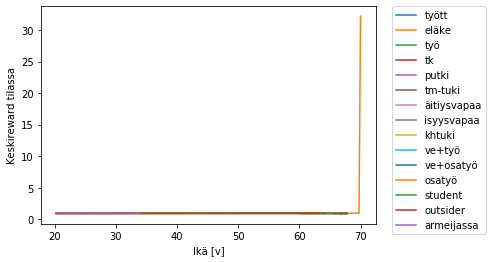

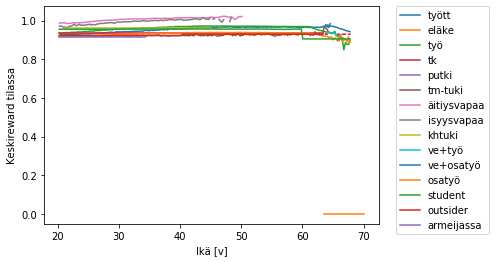

No handles with labels found to put in legend.


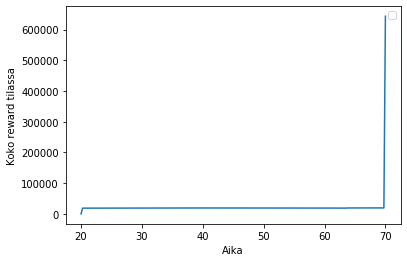

Yhteensä reward 224.30882416288165


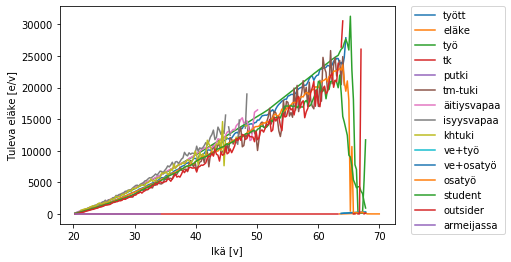

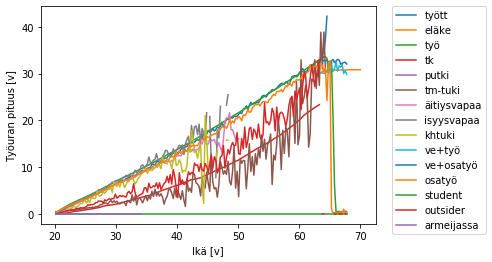

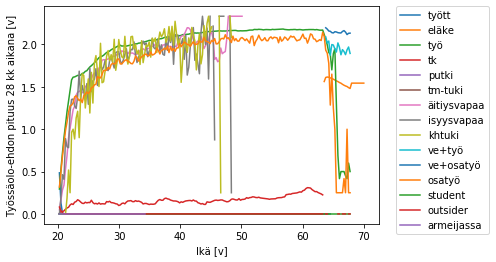

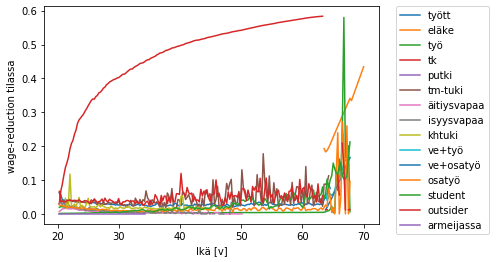

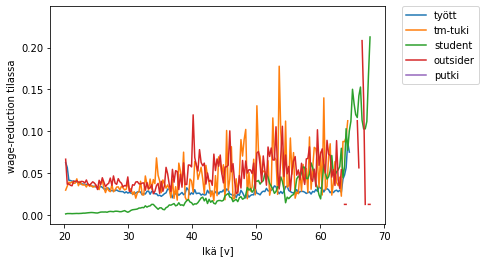

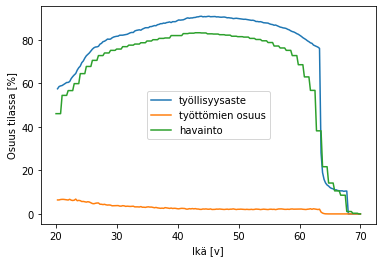

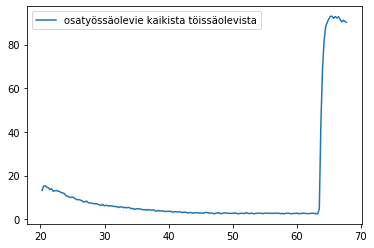

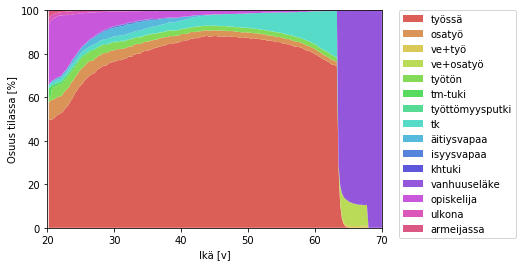

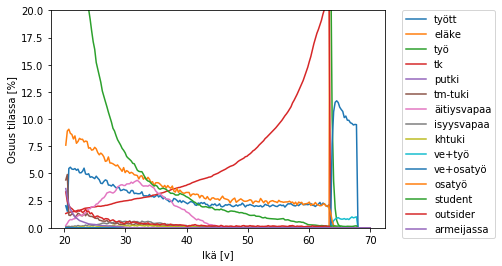

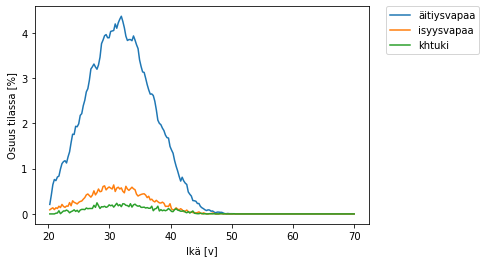

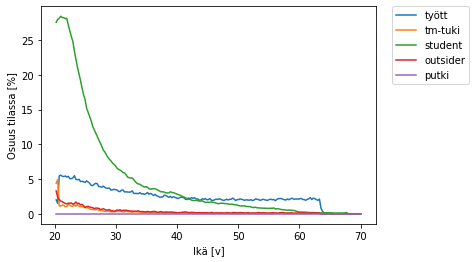

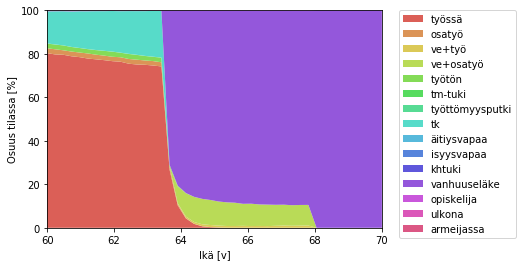

keskimääräinen työttömyysaste 3.5792602531730324


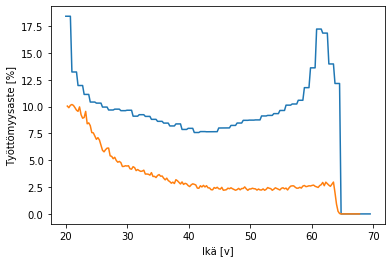

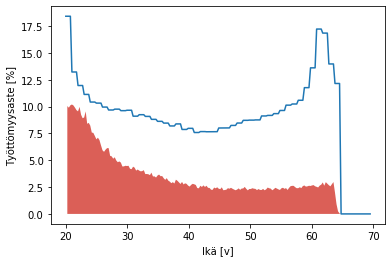

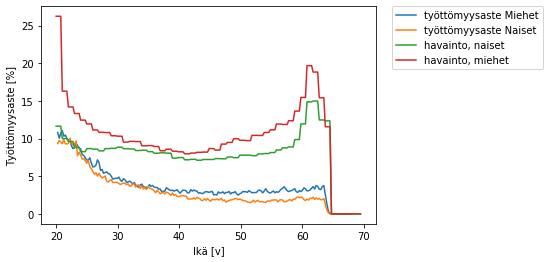

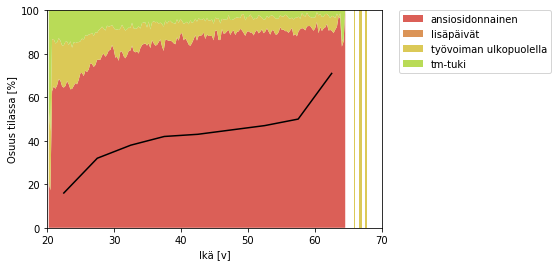

keskimääräinen työttömien osuus väestöstä 2.713747190418456


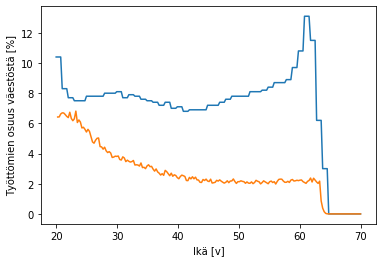

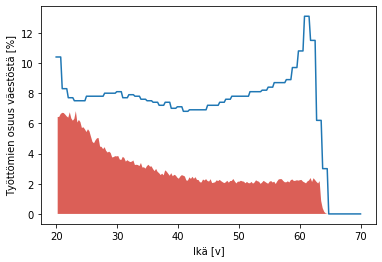

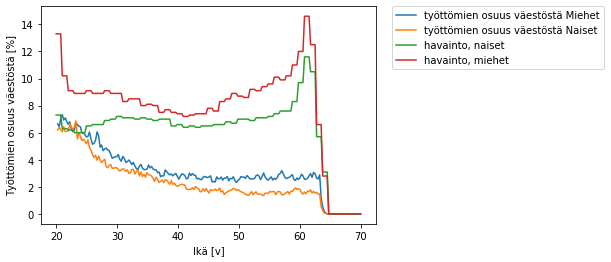

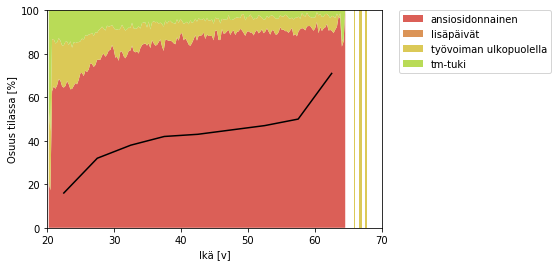

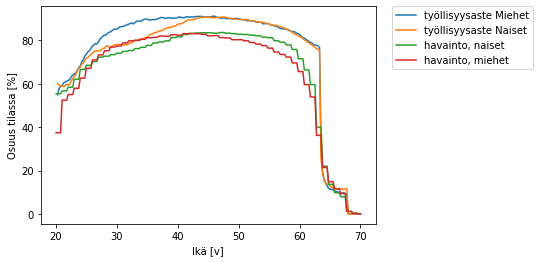

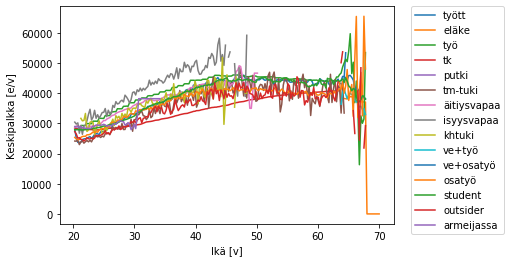

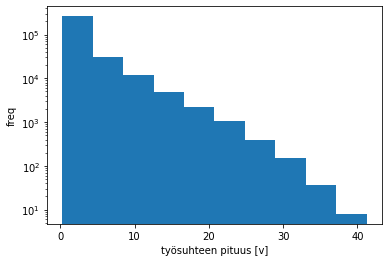

Jakauma ansiosidonnainen+tmtuki+putki


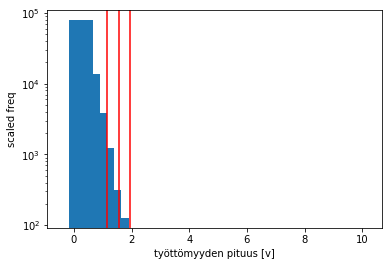

Jakauma ansiosidonnainen+tmtuki ilman putkea


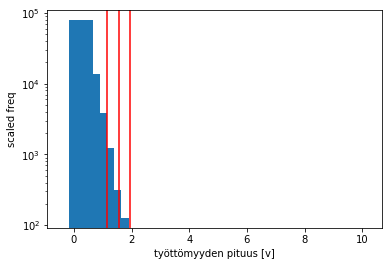

Jakauma tmtuki


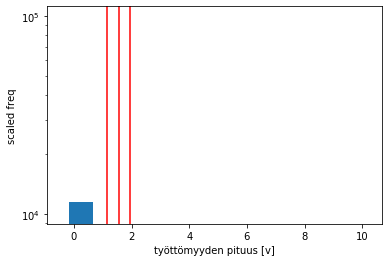

Jakauma työvoiman ulkopuoliset


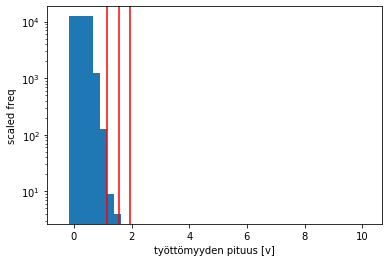

Jakauma laaja (ansiosidonnainen+tmtuki+putki+ulkopuoliset)


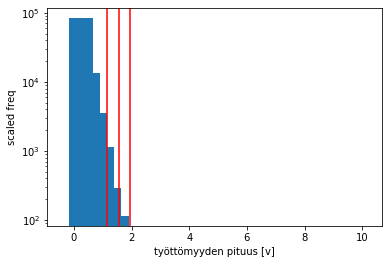

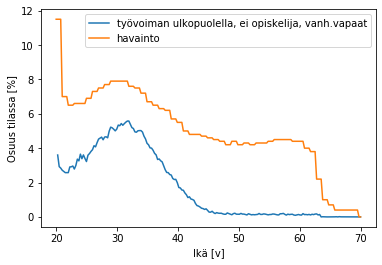

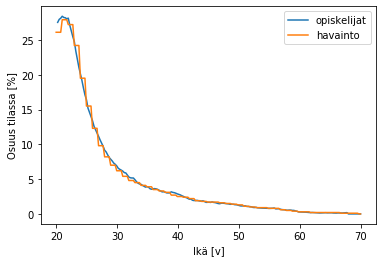

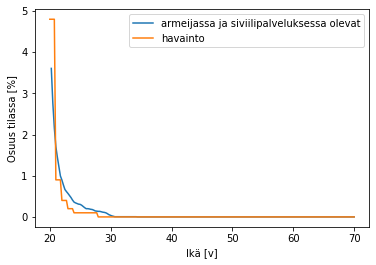

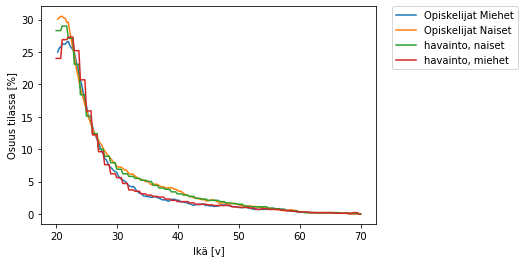

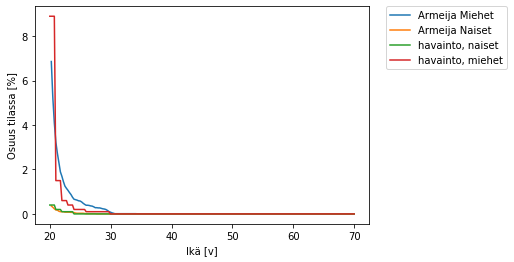

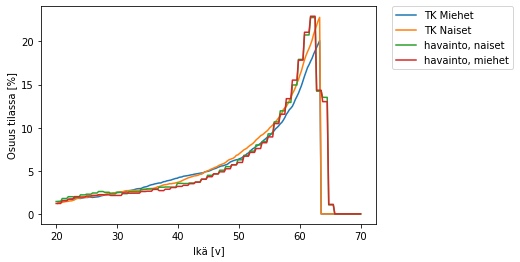

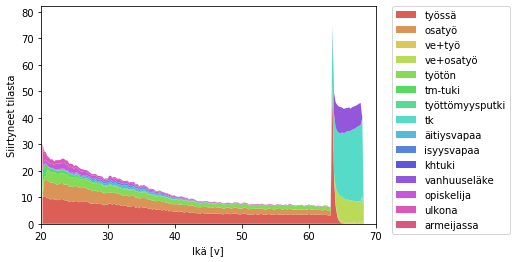

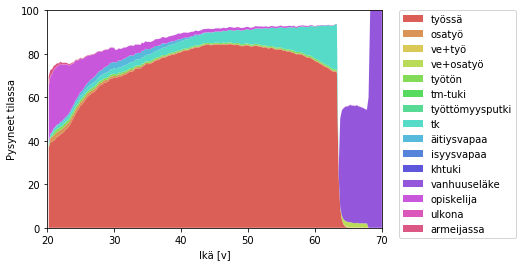

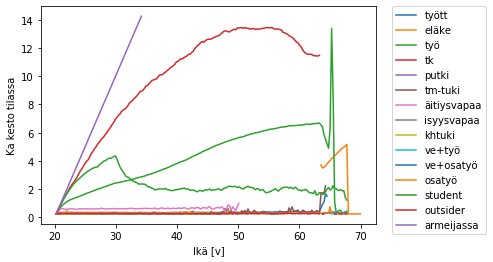

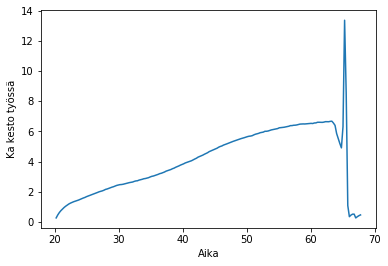

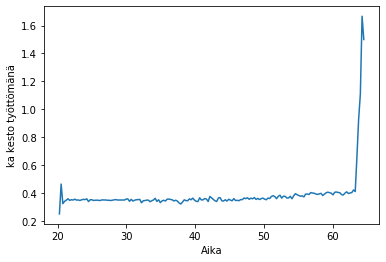

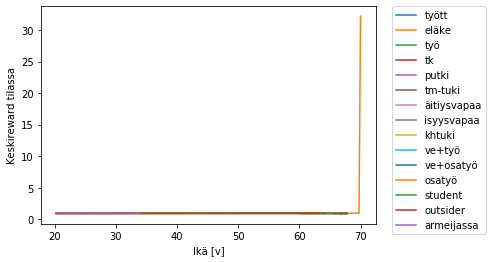

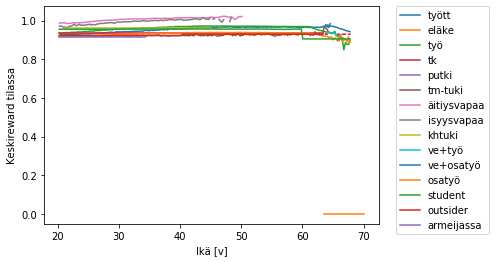

No handles with labels found to put in legend.


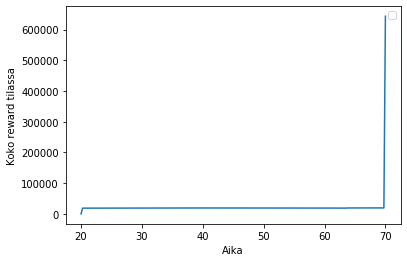

Yhteensä reward 224.30882416288165


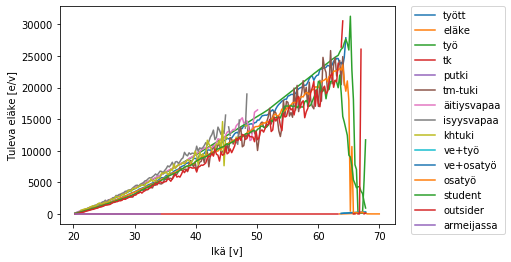

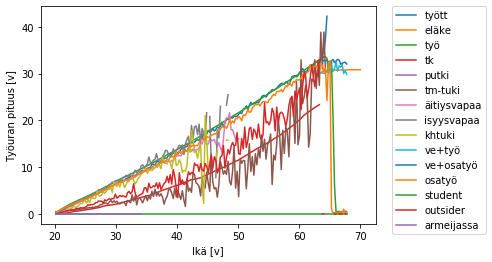

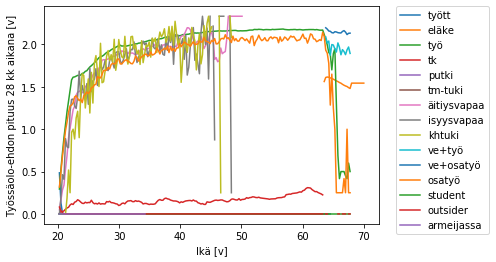

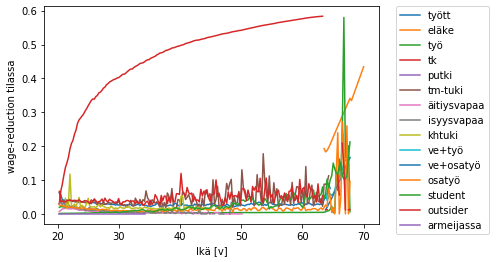

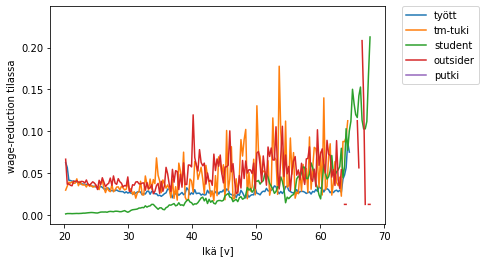

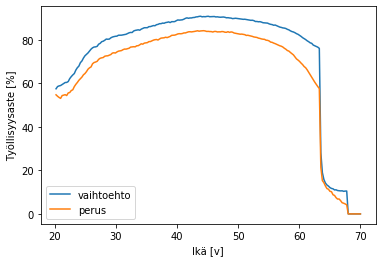

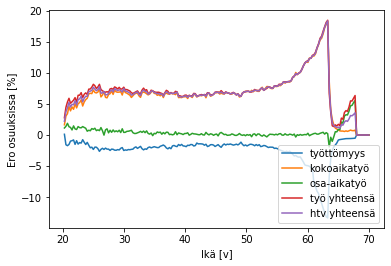

Työllisyysvaikutus 30-63-vuotiaisiin noin 181110.0 htv ja 182936.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin 24.813864816143607 prosenttia
Epävarmuus työllisyysasteissa 0.013859292911256331, hajonta 0.03405515147274652


In [5]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_putki',
                      plot=True,results='results/putki_results',start_from=perusmalli,cont=False,
                      callback_minsteps=callback_minsteps,twostage=twostage)
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1)                    

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True



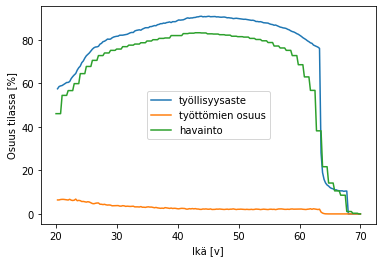

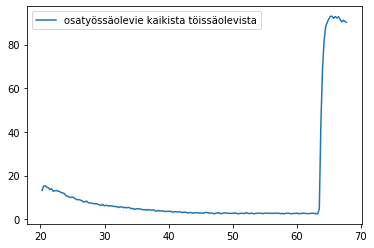

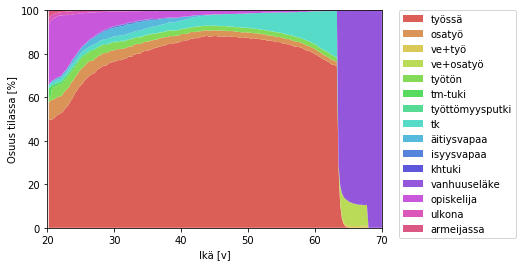

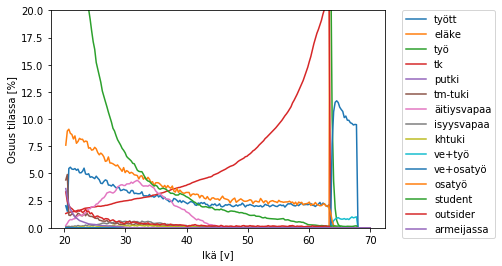

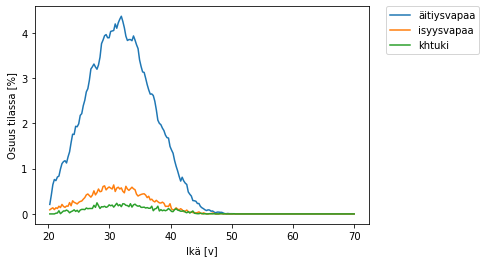

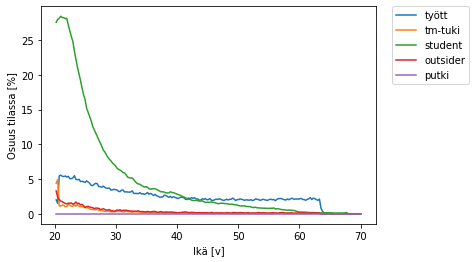

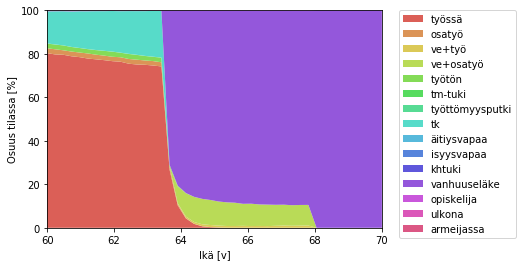

keskimääräinen työttömyysaste 3.5792602531730324


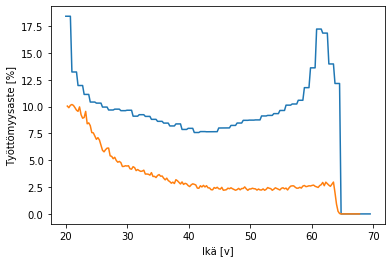

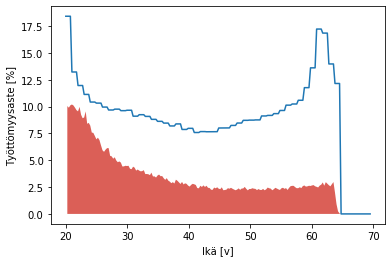

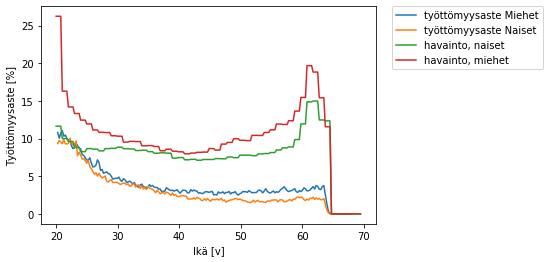

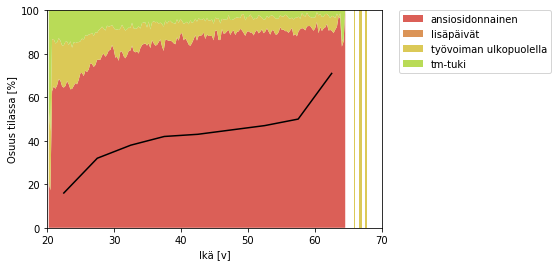

keskimääräinen työttömien osuus väestöstä 2.713747190418456


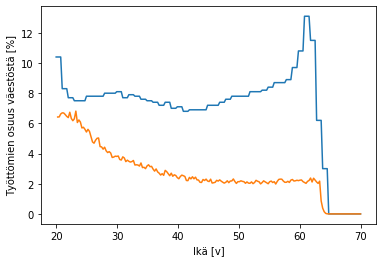

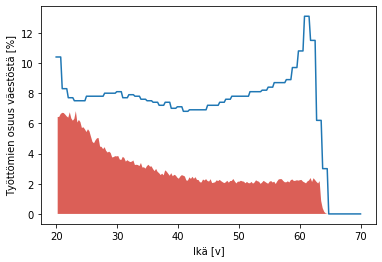

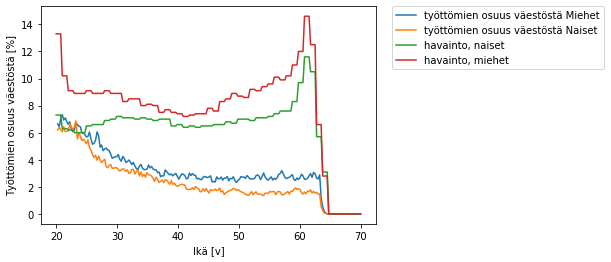

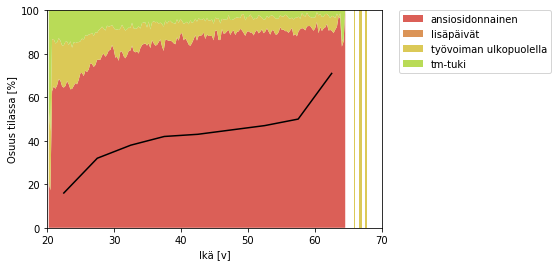

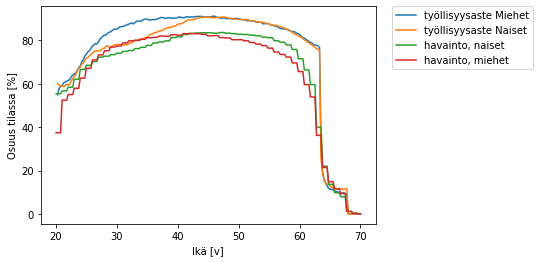

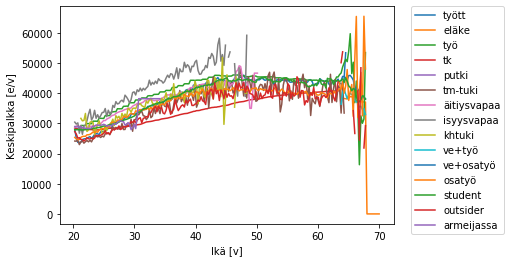

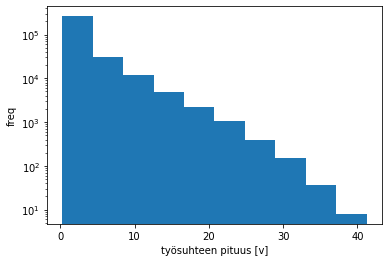

Jakauma ansiosidonnainen+tmtuki+putki


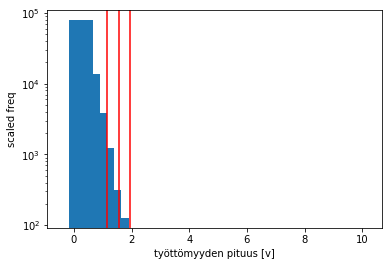

Jakauma ansiosidonnainen+tmtuki ilman putkea


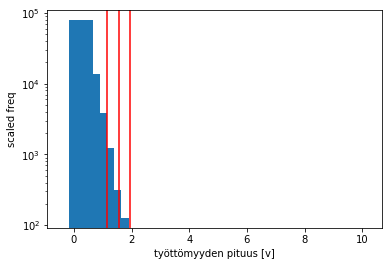

Jakauma tmtuki


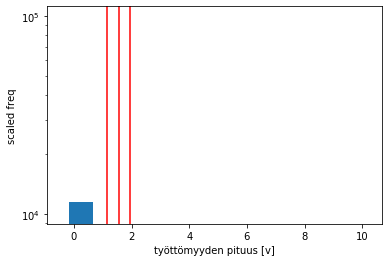

Jakauma työvoiman ulkopuoliset


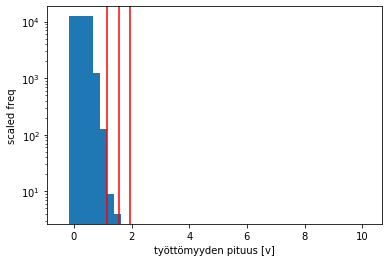

Jakauma laaja (ansiosidonnainen+tmtuki+putki+ulkopuoliset)


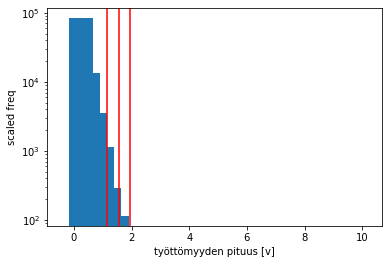

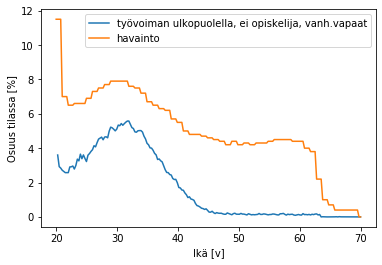

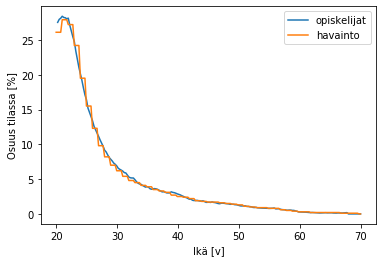

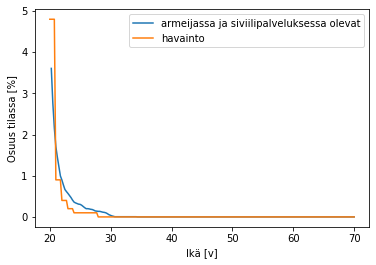

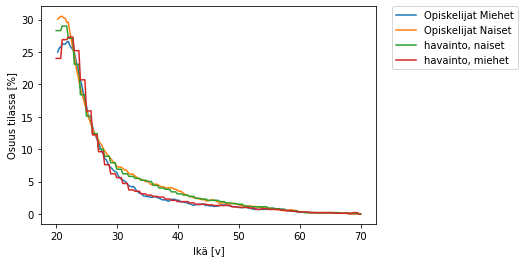

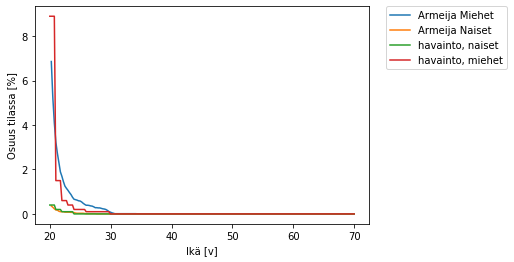

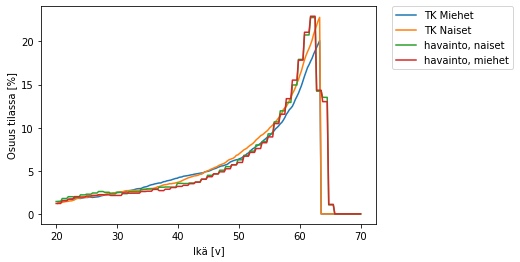

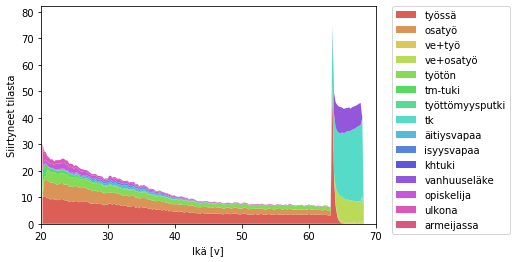

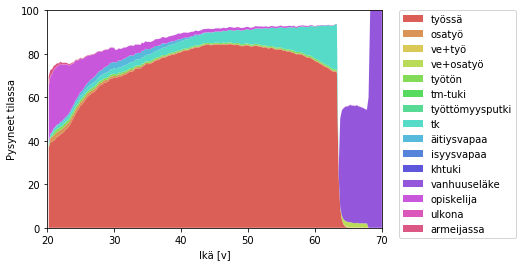

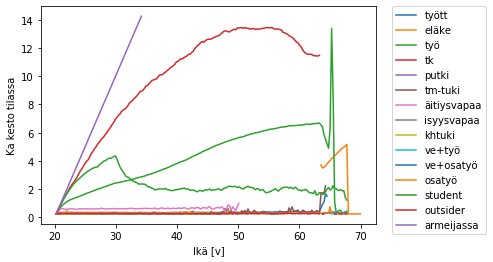

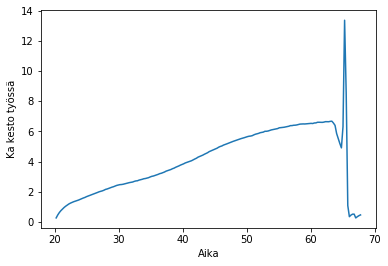

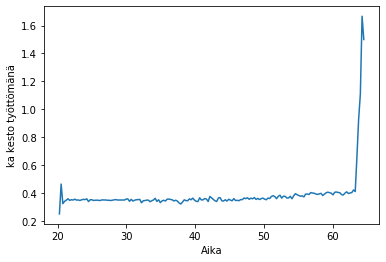

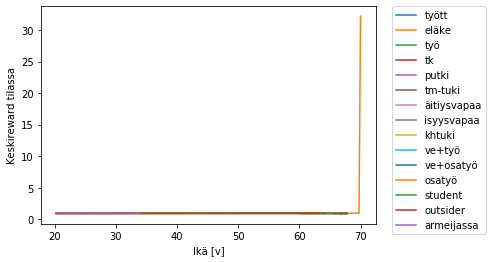

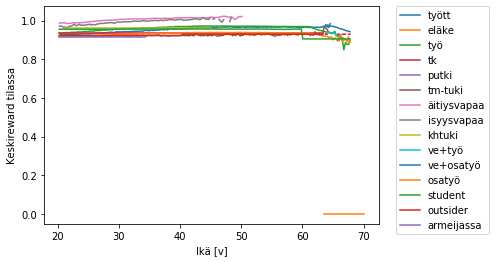

No handles with labels found to put in legend.


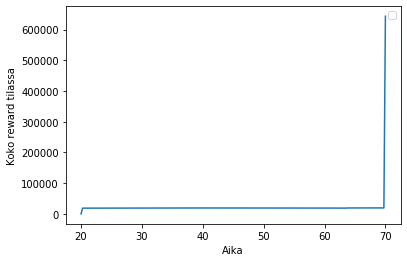

Yhteensä reward 224.30882416288165


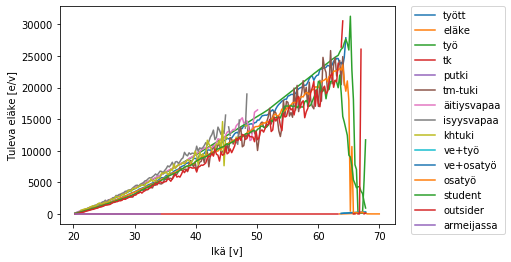

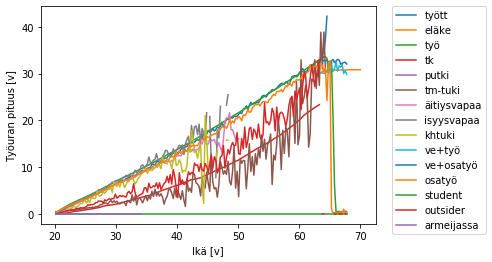

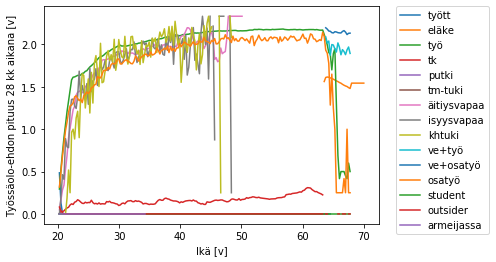

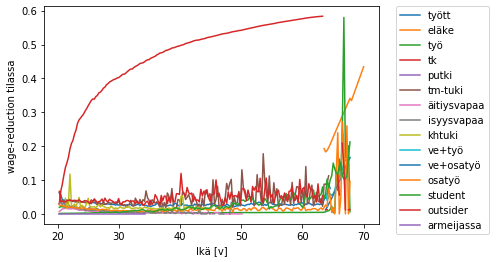

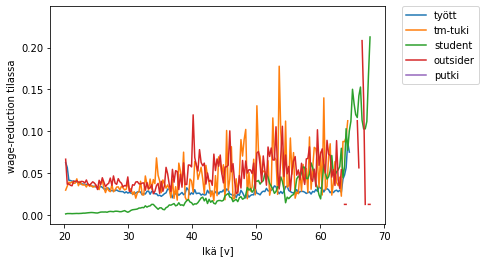

NameError: name 'cc1b' is not defined

In [6]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)

cc1_putki_b.render(load='results/putki_results')
cc1_putki_b.compare_with(cc1) 

## Porrastettu työttömyysturva



In [7]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_steps',plot=True,
                results='results/steps_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc2_porras.render(load='results/steps_results')


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3127     |
| nupdates           | 1        |
| policy_entropy     | 0.895    |
| policy_loss        | -0.0118  |
| total_timesteps    | 0        |
| value_loss         | 0.0063   |
---------------------------------
---------------------------------
| explained_variance | 0.863    |
| fps                | 3417     |
| nupdates           | 10       |
| policy_entropy     | 0.768    |
| policy_loss        | -0.0676  |
| total_timesteps    | 196353   |
| value_loss         | 1

---------------------------------
| explained_variance | 0.998    |
| fps                | 3312     |
| nupdates           | 260      |
| policy_entropy     | 0.888    |
| policy_loss        | -0.0105  |
| total_timesteps    | 5650603  |
| value_loss         | 0.0229   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3314     |
| nupdates           | 270      |
| policy_entropy     | 0.892    |
| policy_loss        | -0.00757 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0228   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3317     |
| nupdates           | 280      |
| policy_entropy     | 0.882    |
| policy_loss        | -0.0131  |
| total_timesteps    | 6086943  |
| value_loss         | 0.0191   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 973      |
| nupdates           | 530      |
| policy_entropy     | 0.908    |
| policy_loss        | -0.0123  |
| total_timesteps    | 11541193 |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 986      |
| nupdates           | 540      |
| policy_entropy     | 0.892    |
| policy_loss        | -0.0101  |
| total_timesteps    | 11759363 |
| value_loss         | 0.00987  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 999      |
| nupdates           | 550      |
| policy_entropy     | 0.912    |
| policy_loss        | -0.0102  |
| total_timesteps    | 11977533 |
| value_loss         | 0.00798  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1278     |
| nupdates           | 800      |
| policy_entropy     | 0.916    |
| policy_loss        | -0.0119  |
| total_timesteps    | 17431783 |
| value_loss         | 0.00627  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1288     |
| nupdates           | 810      |
| policy_entropy     | 0.888    |
| policy_loss        | -0.00876 |
| total_timesteps    | 17649953 |
| value_loss         | 0.0073   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1298     |
| nupdates           | 820      |
| policy_entropy     | 0.902    |
| policy_loss        | -0.0135  |
| total_timesteps    | 17868123 |
| value_loss         | 0.00773  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

BrokenPipeError: [Errno 32] Broken pipe

In [ ]:
cc2_porras.compare_with(cc1)

## EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [ ]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_ek',plot=True,
                results='results/ek_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
#cc2.render(load='results/ek_results')
#cc2.load_sim(load='results/ek_results')

In [ ]:
cc2.compare_with(cc1)
#print(cc1.episodestats.empstate/cc1.n_pop,cc2.episodestats.empstate/cc2.n_pop)
#cc2.episodestats.load_sim('results/ek_res__best')
#cc2.episodestats.render()

## Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/best_12kk',plot=True,
                    results='results/12kk_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_toe.render(load='results/12kk_results')


In [ ]:
cc1_toe.compare_with(cc1)

## Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_50pv',plot=True,
                    results='results/50pv_results',start_from=perusmalli,cont=True,
                    callback_minsteps=callback_minsteps,twostage=twostage)



In [ ]:
cc1_350.render(load='results/50pv_results')
cc1_350.compare_with(cc1)

## Perustulo

Alustava versio perustulosta, joka ei mallinna koko perustuloa vielä. Tulee muuttumaan, kun mukana koko mallli.

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_pt',plot=True,
                   results='results/perustulo_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_pt.render(load='results/perustulo_results')
cc1_pt.compare_with(cc1)

## 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_300pv',plot=True,
                    results='results/300pv_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_400.render(load='results/300pv_results')
cc1_400.compare_with(cc1)

# Deep Q-network

Kokeillaan toista menetelmää ratkaisuun. Muutos on helppo tehdä, muutetaan vain algoritmin valintaa säätelevän parametrin _rlmodel_ arvo, ja varmistetaan että kaikki lähtee alusta liikkeelle (_cont=False_). Deep Q-network on menetelmänä hitaampi kuin ACKTR, joten tässä aika-askelten määrä on rajattu 1 000 000:aan.

In [ ]:
cc1q=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1q.explain()
cc1q.run_results(debug=False,steps1=1_000_000,steps2=size2,pop=1_000,deterministic=deterministic,
                train=True,predict=True,batch1=1,batch2=batch2,
                save=perusmalli+'_dqn',plot=True,cont=False,start_from=perusmalli+'_dqn',results='results/perus_results3_dqn',
                callback_minsteps=callback_minsteps,rlmodel='dqn',twostage=False)